In [8]:
import seaborn as sns
print("Seaborn is installed successfully!")


Seaborn is installed successfully!


In [9]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv("student-mat.csv", delimiter=";")


In [35]:
# Display the first few rows of the dataset
display(df.head())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [12]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())


Missing values per column:
school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3    0
dtype: int64


In [13]:
# Display data types of each column
print("\nData Types:")
print(df.dtypes)



Data Types:
school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3    object
dtype: object


In [14]:
# Display dataset size
print("\nDataset Shape:", df.shape)


Dataset Shape: (395, 1)


In [17]:
# Handle missing values (if any)
df.fillna(df.select_dtypes(include=[np.number]).median(), inplace=True)


In [18]:
# Remove duplicate entries
df.drop_duplicates(inplace=True)

In [19]:
# --- Analysis ---

In [26]:
# 1. What is the average score in math (G3)?
df = pd.read_csv("student-mat.csv", delimiter=";")
print(df.columns)
avg_g3 = df['G3'].mean()
print(f"Average Final Grade (G3): {avg_g3:.2f}")




Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')
Average Final Grade (G3): 10.42


In [27]:
# 2. How many students scored above 15 in G3?
print("\nCounting students who scored above 15 in G3...")
students_above_15 = (df['G3'] > 15).sum()
print(f"Number of students who scored above 15 in G3: {students_above_15}")


Counting students who scored above 15 in G3...
Number of students who scored above 15 in G3: 40


In [28]:
# 3. Correlation between study time and G3
print("\nCalculating correlation between study time and final grade (G3)...")
correlation = df[['studytime', 'G3']].corr()
print("Correlation between study time and G3:")
print(correlation)


Calculating correlation between study time and final grade (G3)...
Correlation between study time and G3:
           studytime       G3
studytime    1.00000  0.09782
G3           0.09782  1.00000


In [29]:
# 4. Which gender has a higher average final grade (G3)?
print("\nComparing average final grades by gender...")
avg_g3_by_gender = df.groupby('sex')['G3'].mean()
print("Average Final Grade by Gender:")
print(avg_g3_by_gender)


Comparing average final grades by gender...
Average Final Grade by Gender:
sex
F     9.966346
M    10.914439
Name: G3, dtype: float64


In [ ]:
# --- Data Visualization ---



Generating histogram for final grades (G3)...


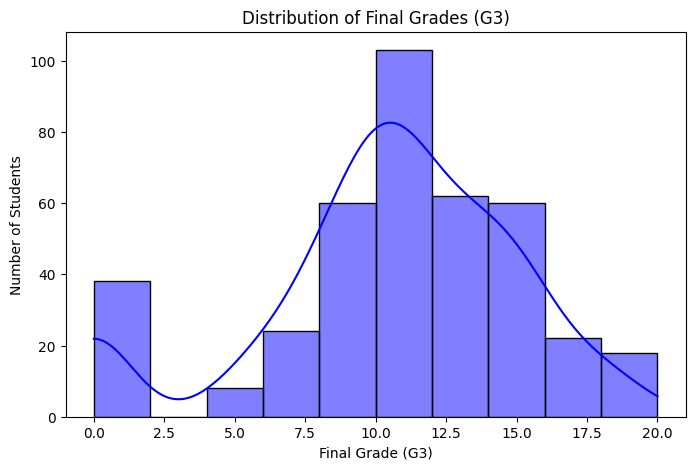

In [30]:

# 1. Histogram of final grades (G3)
print("\nGenerating histogram for final grades (G3)...")
plt.figure(figsize=(8, 5))
sns.histplot(df['G3'], bins=10, kde=True, color='blue')
plt.xlabel("Final Grade (G3)")
plt.ylabel("Number of Students")
plt.title("Distribution of Final Grades (G3)")
plt.show()



Generating scatter plot for study time vs. final grade (G3)...


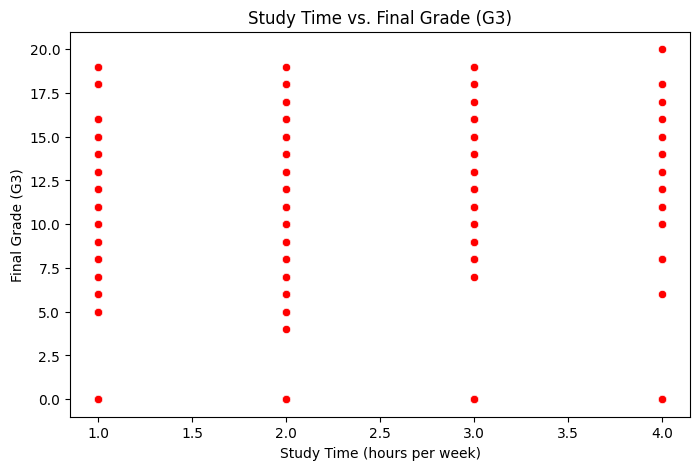

In [31]:

# 2. Scatter plot between study time and final grade (G3)
print("\nGenerating scatter plot for study time vs. final grade (G3)...")
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['studytime'], y=df['G3'], color='red')
plt.xlabel("Study Time (hours per week)")
plt.ylabel("Final Grade (G3)")
plt.title("Study Time vs. Final Grade (G3)")
plt.show()


Generating bar chart for average final grade by gender...


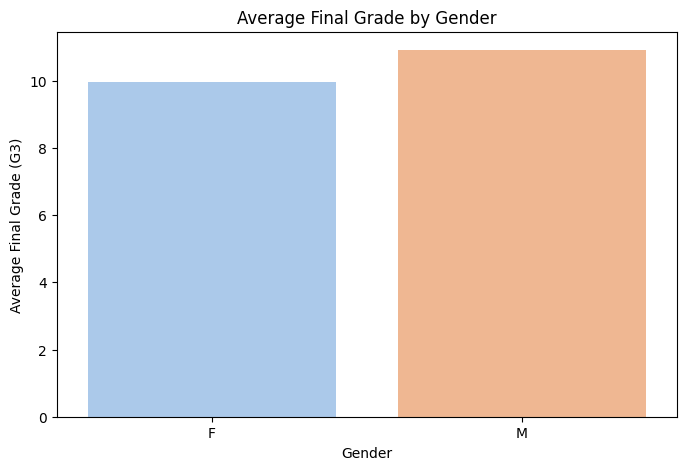

In [33]:

# 3. Bar chart comparing the average scores of male and female students
print("\nGenerating bar chart for average final grade by gender...")
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_g3_by_gender.index, y=avg_g3_by_gender.values, hue=avg_g3_by_gender.index, palette='pastel', legend=False)
plt.xlabel("Gender")
plt.ylabel("Average Final Grade (G3)")
plt.title("Average Final Grade by Gender")
plt.show()